In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected stage_train_dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [74]:
df = pd.read_csv("cleaned_chatelet.csv")
df.head()

,DATE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-09-29 01:00:00+00:00,5.0,7.0,20.0,444.0,18.8,47.6
1,2022-09-29 00:00:00+00:00,3.0,23.0,11.0,450.0,17.8,50.0
2,2022-09-28 23:00:00+00:00,6.0,32.0,36.0,491.0,18.0,49.3
3,2022-09-28 22:00:00+00:00,4.0,28.0,39.0,526.0,18.1,46.8
4,2022-09-28 21:00:00+00:00,2.0,18.0,36.0,571.0,18.2,43.5


In [43]:
missing_values_table(df)

Your selected stage_train_dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [44]:
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
df


,NO,NO2,PM10,CO2,TEMP,HUMI
DATE,,,,,,
2022-09-29 01:00:00+00:00,5.0,7.0,20.0,444.0,18.8,47.6
2022-09-29 00:00:00+00:00,3.0,23.0,11.0,450.0,17.8,50.0
2022-09-28 23:00:00+00:00,6.0,32.0,36.0,491.0,18.0,49.3
2022-09-28 22:00:00+00:00,4.0,28.0,39.0,526.0,18.1,46.8
2022-09-28 21:00:00+00:00,2.0,18.0,36.0,571.0,18.2,43.5
...,...,...,...,...,...,...
2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9
2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8
2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0


In [45]:
min(df.index)

Timestamp('2013-01-01 01:00:00+0000', tz='UTC')

In [46]:
max(df.index)

Timestamp('2022-09-29 01:00:00+0000', tz='UTC')

The data is from 2013-01-01 to 2022-09-29

Everyday has its mearurements at sharp hours

<AxesSubplot: >

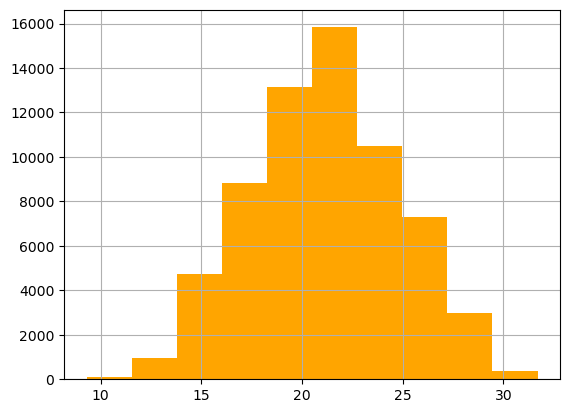

In [47]:
df.TEMP.hist(color='orange')

<AxesSubplot: >

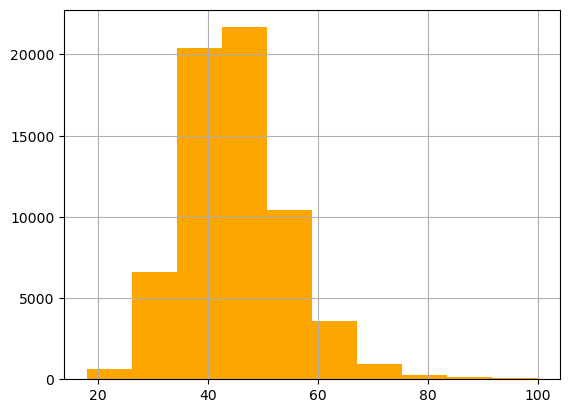

In [48]:
df.HUMI.hist(color='orange')

TEMP and HUMI are approximately normally distributed, which might already hint to a good performance of a Gaussian Naive Bayes model.

<AxesSubplot: >

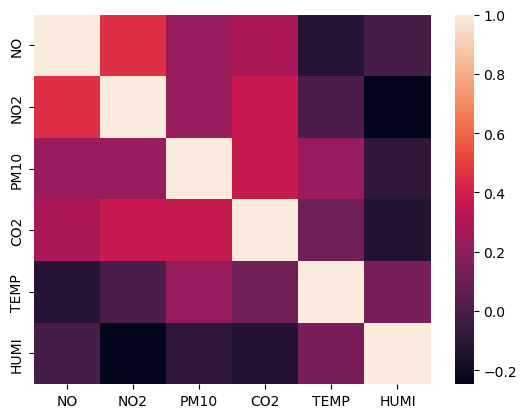

In [49]:
sns.heatmap(df.corr())

NO2 and HUMI are strongly negatively correlated

NO2 CO2, and NO are strongly positively correlated

In [50]:
monthly_data = df
monthly_data = monthly_data.resample("M").mean()
monthly_data.head()

,NO,NO2,PM10,CO2,TEMP,HUMI
DATE,,,,,,
2013-01-31 00:00:00+00:00,35.843111,40.832196,107.598909,621.360164,18.057299,39.131514
2013-02-28 00:00:00+00:00,27.071865,41.266055,95.920489,603.642202,16.993578,35.862997
2013-03-31 00:00:00+00:00,25.271978,51.142857,98.513736,638.458791,16.523901,38.328846
2013-04-30 00:00:00+00:00,25.422160,55.566620,142.131837,585.301543,19.878822,37.770407
2013-05-31 00:00:00+00:00,24.291961,44.492243,171.746121,551.342736,22.117207,41.708745


<AxesSubplot: xlabel='DATE'>

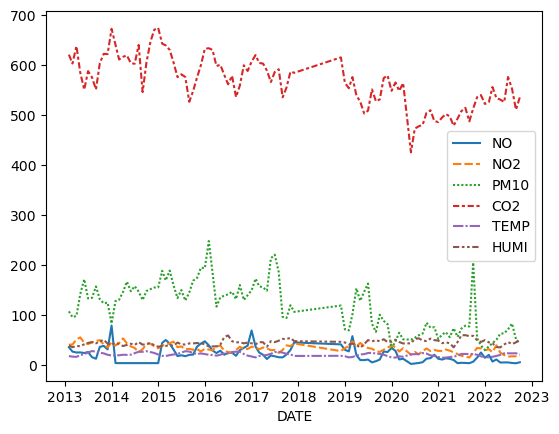

In [51]:
sns.lineplot(data=monthly_data)

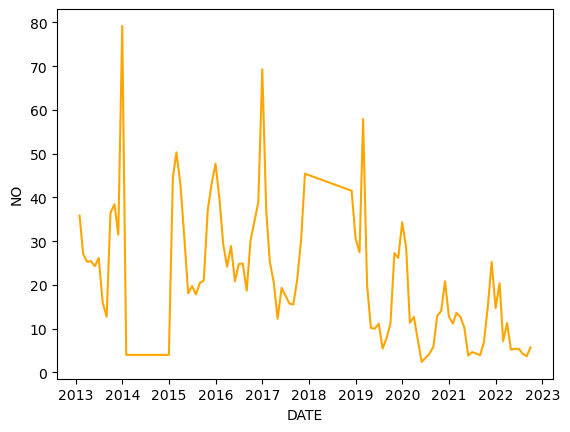

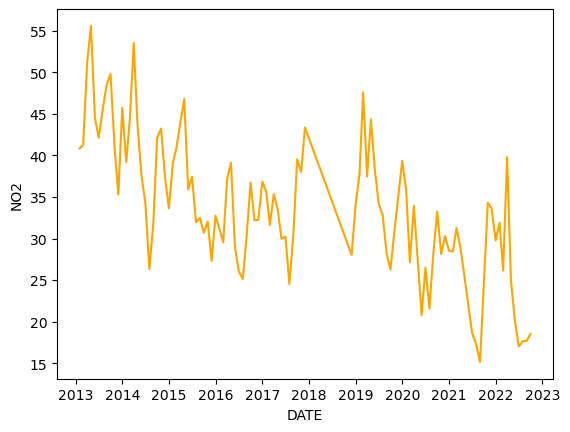

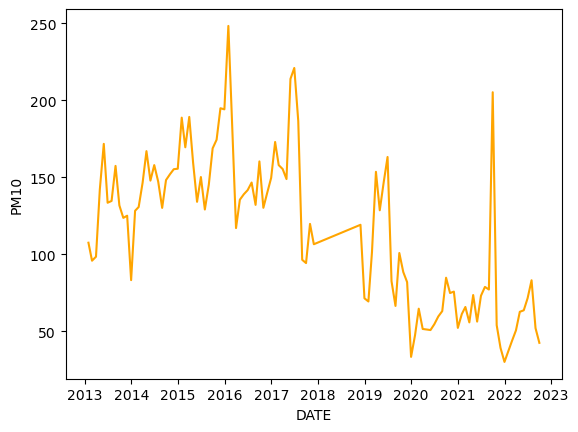

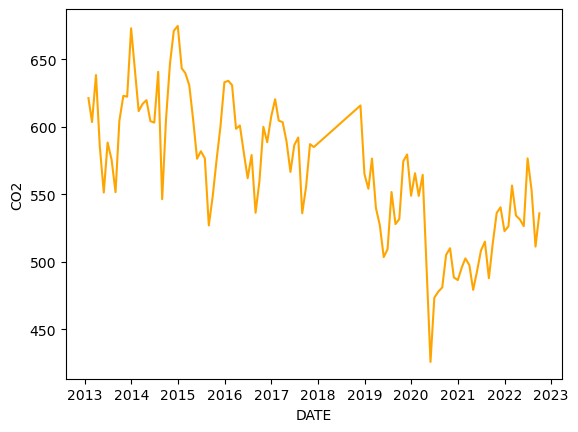

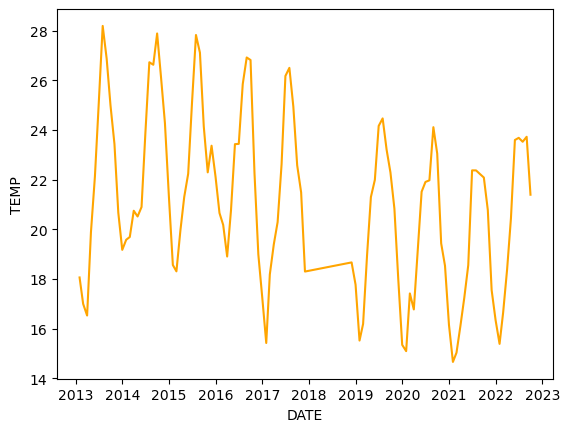

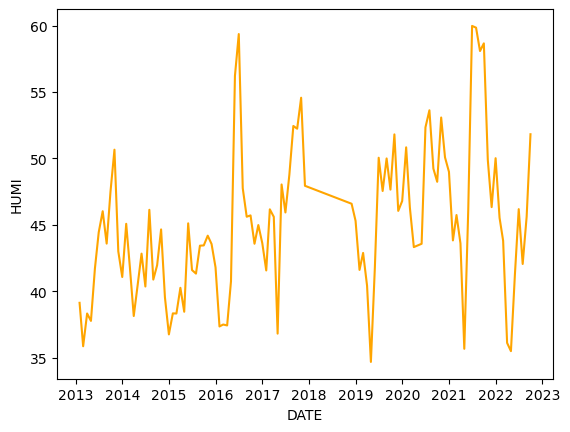

In [57]:
for column_i in list(monthly_data.columns):
    plt.figure()
    sns.lineplot(data=monthly_data[column_i],color='orange')

NO,NO2,CO2 are in decreasing trend. Air quality improving over the years

In [58]:
monthly_data_combined = monthly_data.groupby(monthly_data.index.month).mean()
monthly_data_combined.head()

,NO,NO2,PM10,CO2,TEMP,HUMI
DATE,,,,,,
1,27.609288,35.528817,117.966127,589.137562,16.989896,42.585220
2,25.107737,35.532543,112.873069,586.161923,17.623392,42.052624
3,19.296981,40.135859,113.189503,580.526443,18.413885,40.358871
4,15.908963,39.168367,127.274066,567.434302,20.213199,37.508922
5,12.013757,30.885029,124.972436,536.528433,21.880843,45.184712


<AxesSubplot: xlabel='DATE'>

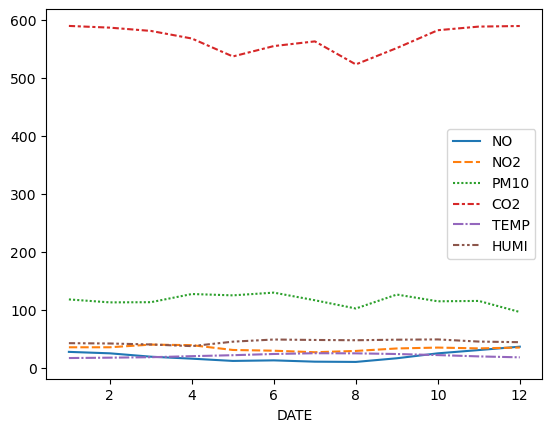

In [59]:
# we can drop the first line in order to make the other progressions more visible
# sns.lineplot(data=monthly_data_combined.drop('CO2', axis=1))
sns.lineplot(data=monthly_data_combined)

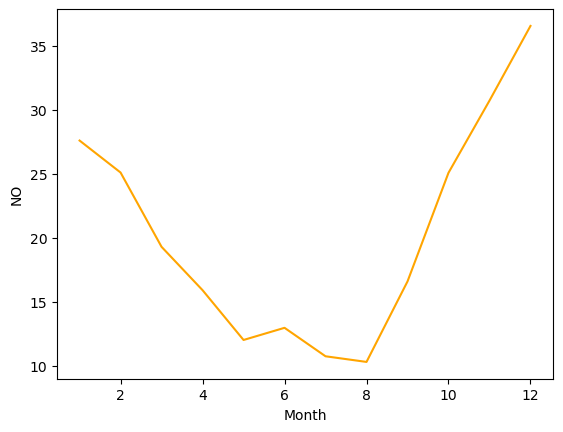

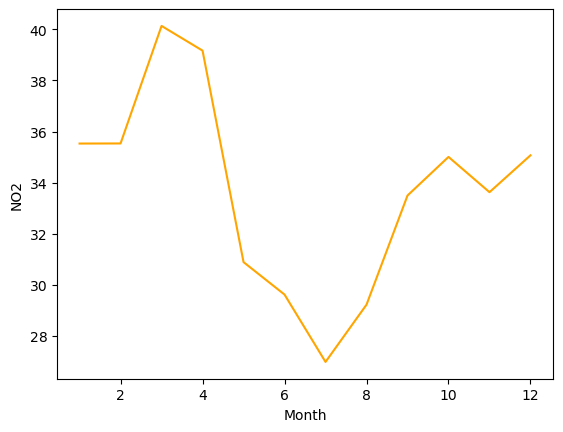

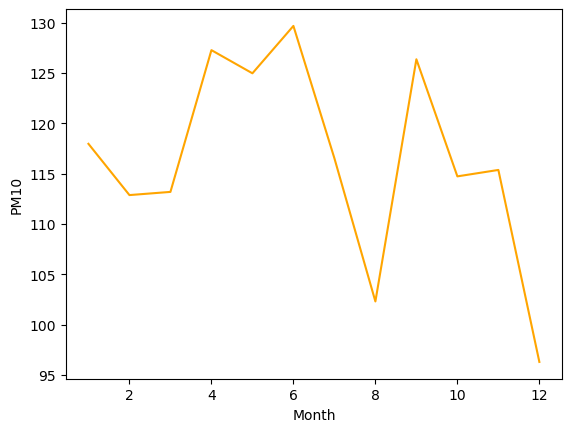

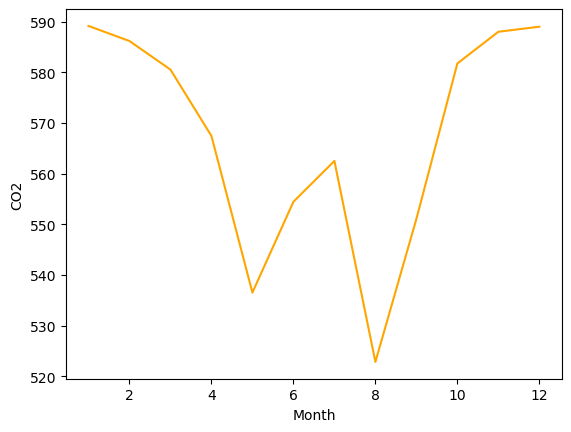

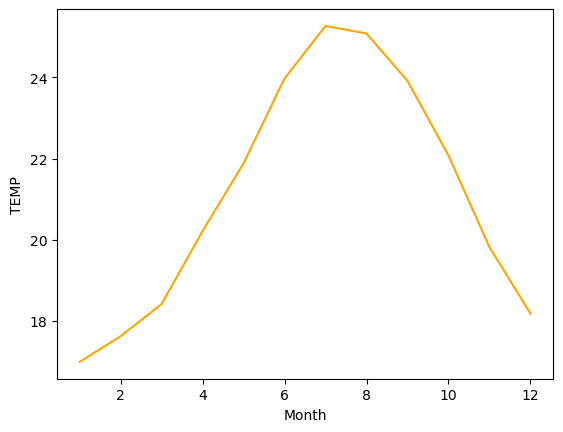

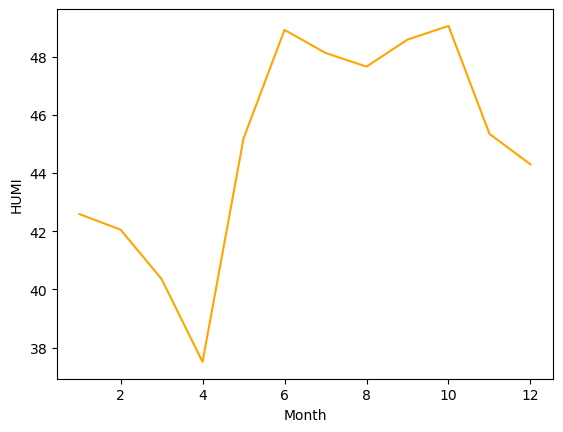

In [67]:
from cProfile import label


for column_i in list(monthly_data_combined.columns):
    plt.figure()
    sns.lineplot(data=monthly_data_combined[column_i],color='orange')
    plt.xlabel('Month')

NO and NO2 dropped sharply in summer.

Maybe it is because the inperfect combustion is more servere in winter and the increase of fussil fuel use for heating

In [68]:
hourly_data = df.groupby(df.index.hour).mean()
hourly_data.index.rename('HOUR', inplace=True)
hourly_data.head()

,NO,NO2,PM10,CO2,TEMP,HUMI
HOUR,,,,,,
0,14.366071,32.217634,89.622396,482.466890,21.136682,44.297061
1,15.067557,30.867939,96.345420,457.460687,20.876412,44.849351
2,13.766911,28.498647,102.645922,443.485118,20.741747,45.357325
3,12.160798,26.133803,91.558294,436.739045,20.590219,45.680790
4,11.281154,24.972308,67.058077,438.482692,20.535462,45.822154


<AxesSubplot: xlabel='HOUR', ylabel='CO2'>

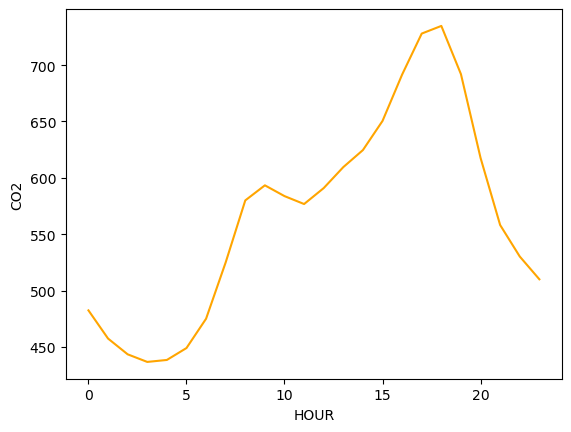

In [69]:
sns.lineplot(data=hourly_data, y='CO2', x='HOUR', color='orange')

Two peaks in CO2 Levels in rush hour (aroung 9:00 and 18:00)

In [65]:
monthly_hourly_data = df.groupby([df.index.hour, df.index.month]).mean()
monthly_hourly_data.index.rename(['HOUR','MONTH'], inplace=True)
monthly_hourly_data = monthly_hourly_data.reset_index( level = [0 , 1] )
monthly_hourly_data.head()

,HOUR,MONTH,NO,NO2,PM10,CO2,TEMP,HUMI
0,0,1,17.069106,32.699187,103.004065,504.227642,17.202033,41.104472
1,0,2,17.904959,34.392562,83.714876,509.789256,17.926446,40.580992
2,0,3,11.739130,41.111111,92.314010,503.531401,18.957005,38.609179
3,0,4,9.548544,38.135922,101.684466,462.514563,20.361165,36.403883
4,0,5,7.801020,31.403061,104.204082,458.428571,22.059694,43.511735


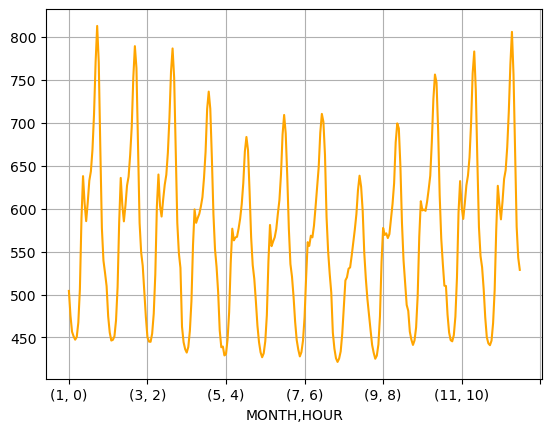

In [66]:
ax = monthly_hourly_data.groupby(['MONTH', 'HOUR'])['CO2'].mean().plot(kind='line', color='orange', grid=True)

The morning rushhour peak is less prominent or completely disappeared in the sumer months, which makes sense because most working people and students are taking vacation.

In [ ]:
# ... more EDA

## Use Yearly_num(11), Monthly_num(12), Hourly_num(24) as features to do regression 

In [70]:
df

,NO,NO2,PM10,CO2,TEMP,HUMI
DATE,,,,,,
2022-09-29 01:00:00+00:00,5.0,7.0,20.0,444.0,18.8,47.6
2022-09-29 00:00:00+00:00,3.0,23.0,11.0,450.0,17.8,50.0
2022-09-28 23:00:00+00:00,6.0,32.0,36.0,491.0,18.0,49.3
2022-09-28 22:00:00+00:00,4.0,28.0,39.0,526.0,18.1,46.8
2022-09-28 21:00:00+00:00,2.0,18.0,36.0,571.0,18.2,43.5
...,...,...,...,...,...,...
2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9
2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8
2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0
